<a href="https://colab.research.google.com/github/cotozelo/Ciencia_Dados_-_Diversos/blob/main/src/serie_temproal/Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Referências:
[[1]](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

[[2]](https://dataml.com.br/series-temporais-como-aprendizado-supervisionado/)

[[3]](https://repositorio.ufsc.br/bitstream/handle/123456789/204261/TCC_Walter_finalA4.pdf?sequence=1&isAllowed=y)

#Série Temporal - Teoria
---





Esse notebook tem como finalindade promover um pequeno estudo sobre série temporal. Iremos fazer um comparativo entre algumas metodologias de predição de séries temporais.

Série temporal, é um modelo de previsão que leva em consideração o tempo, nesse modelo os dados são baseados no tempo (anos, dias, horas, minutos).

Alguns problemas que podem ser resolvidos com séries temporal são:
* número de vendas para o próximo período, seja: ano, mês, semana...
* tráfego em um site.
* entre outros, lembrando que precisam ser dados relacionado a um período de tempo.


## Série Estacionaria 

Existem 3 critérios para definir uma série como estacionaria:
1.   A média dos valores da série não pode ser em função do tempo. Na figura a baixo podemos ver claramente que a série da esquerda mantém a média ao longo do tempo e a série da direita a média cresce com o tempo.

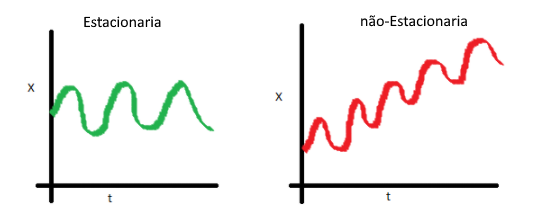

2.   A variação da série não deve ser em função do tempo. Essa propriedade é conhecida como homocedasticidade. A figura a baixo mostra a diferença entre elas. Onde a série da esquerda é estacionaria e a da direita é não-estacionaria. 

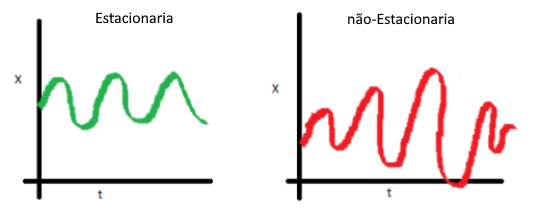

3. A covariância do i-ésimo termpo e do (i+m)-ésimo termo não pode ser função do tempo. Na figura abaixo, verá que na série da direita a frequência aumenta, mudando assim a covariância em relação ao tempo, tornando essa série não-estacionaria.

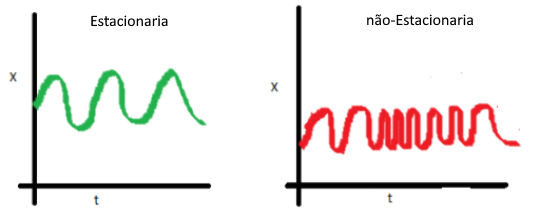

### Por que me preocupo com a 'estacionariedade' de uma série temporal?

A razão pela qual peguei esta seção primeiro foi que, a menos que sua série temporal seja estacionária, você não pode construir um modelo de série temporal. 

Nos casos em que o critério estacionário é violado, o primeiro requisito passa a ser estacionarizar a série temporal e, em seguida, tentar modelos estocásticos para prever essa série temporal. Existem várias maneiras de trazer essa estacionariedade. Alguns deles são: Detrending, Differencing, Dickey-Fuller etc.


### Teste de Dickey-Fuller



Este é um teste de vários valores estatísticos, onde analizamos principalmente o *'teste estatístico'* e se ele for menor do que o *'valor crítico'* então podemos afirmar que a série é estacionária.

Abaixo mostraremos um retorno de uma função (implementaca a seguir) que imprime as métricas do teste de Dickey-Fuller.

```
Resultados do teste de Dickey-Fuller:
Teste Estatístico                 0.815369
p-value                           0.991880
#Lags Usadas                     13.000000
Número de observações usadas    130.000000
Valor crítico (1%)               -3.481682
Valor crítico (5%)               -2.884042
Valor crítico (10%)              -2.578770
dtype: float64
```

Vemos claramente que o *'teste estatístico'* [0.815369] aprestente um valor muito maior do que os *'valor crítico'* [-3.481682; -2.884042; -2.578770]. 





#### Estimando e Eliminando Tendência

Embora o pressuposto de estacionaridade seja considerado em muitos modelos de séries temporal, quase nenhuma série temporal na prática é estacionária. 

Na verdade, é quase impossível fazer uma série perfeitamente estacionária, mas tentaremos chegar o mais próximo possível.

Existem 2 principais razões por trás da não estacionaridade de uma série temporal:

 1. **Tendência** – média variante ao longo do tempo. Por exemplo, em média, o número de passageiros em um cia de aviação crescendo ao longo do tempo.
 
2. **Sazonalidade** – variações em períodos específicos. Por exemplo, as pessoas podem ter uma tendência a comprar carros em um mês em particular por causa de incremento de salário.

Podemos usar algumas técnicas para estimar ou modelar a tendência e, em seguida, removê-la da série. Podem haver muitas maneiras de fazer isso e algumas das mais comumente utilizadas são:

 1. **Agregação** – usando a média para um período de tempo como médias semanais ou mensais.

 2. **Suavização** – usando médias moveis.

 3. **Ajuste polinomial** – encaixando um modelo de regressão.

## Principais elementos de uma série temporal

Os principais elementos independentes que promovem um entendimento do comportamento dos eventos de uma série são:
* Tendência
* Sazonalidade
* Ruído

A tendência e sazonalidade podem ser sintetizada de forma deterministica, mas o ruído sempre é um fator aleatório.


##Janela Deslizante (sliding window)




Precisamos portanto organizar nossa série em pares (X, Y) de sequências de entrada e sequências de saída.

Sabemos que devido a existência de uma dependência temporal entre as observações de uma série, instantes passados influenciam instantes futuros. Quando desejamos prever o valor em um instante t de uma série temporal utilizamos somente as informações contidas nos instantes anteriores a t.

Você poderia pensar em utilizar todos os valores da série anteriores ao instante t, porém é mais sensato utlizar uma janela de valores imediatamente anteriores(lags) a t pois estes normalmente apresentam uma maior correlação com o instante que queremos prever além de reduzir o tempo de treino do modelo.

A técnica de janela deslizante consiste em percorrer os valores da série criando pares (X, Y) onde X consiste em uma janela de k lags a um instante t e Y consiste no instante t em questão.


## Qualidade do modelo



Para determinar a qualidade de um modelo preditivo de rede tempo o resíduo e erro.
* **Resíduo**, é a diferença entre o previsto e observado durante a etapa de modelagem (treino).
* **Erro**, é a diferença entre o previsto e observado, quando aplicado o modelo nos dados de validação.

As principais métrica usadas são:

* **Raiz do Erro Quadrático Médio (RMSE)**. Essa tem como característica penalizar os valores mais distantes da média. Sua interpretação é difícil pois não esta na mesma unidade dos dados.

* **Erro Médio Absoluto (MAE)**. Mede a magnitude média dos erros em valores absolutos, em que todas as amostra possuem um peso individual igual. Sua interpretação é mais simples pois sua unidade é a mesma dos dados.




# Código - Um passo-a-passo para lidar com série temporal

## Exemplo - AirPassengers.csv


### imports

In [76]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Carregando dados

In [77]:
# tratameno de dados faltantes
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My Drive
%cd Colab Notebooks
%cd Ciencia_Dados_-_Diversos

dados_raw = pd.read_csv('AirPassengers.csv', sep=",")
dados_raw.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive
/gdrive/My Drive/Colab Notebooks
/gdrive/My Drive/Colab Notebooks/Ciencia_Dados_-_Diversos


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Tratamento das colunas

Convertendo a coluna Month em uma coluna de data

In [79]:
dados_raw.dtypes

Month          object
#Passengers     int64
dtype: object

In [80]:
dados = dados_raw
dados['Month'] = pd.to_datetime(dados['Month'], format="%Y-%m")
dados.index = dados.Month
dados.drop('Month', axis=1, inplace=True)
print(dados.dtypes)
dados.head()

#Passengers    int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [81]:
dados.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Criando uma Série Temporal, e manipulando-a

In [82]:
ts = dados['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [83]:
# busca por data
ts['1949-01-01'] 

112

In [84]:
# usando datetime para busca
ts[datetime(1949,1,1)]

112

In [85]:
# buscando intervalo de datas, as duas são contindas
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [86]:
# tudo até data final
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [87]:
# buscando por anos
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

### Analisando a série

#### Aplicando Teste de Dickey-Fuller

In [88]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  
  #Determing rolling statistics
  #rolmean = pd.rolling_mean(timeseries, window=12)
  rolmean = timeseries.rolling(12).mean()
  #rolstd = pd.rolling_std(timeseries, window=12)
  rolstd = timeseries.rolling(12).std()

  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Média')
  std = plt.plot(rolstd, color='black', label = 'Desvio Padrão')
  plt.legend(loc='best')
  plt.title('Verificando média e desvio padrão da série')
  plt.xlabel('Anos')
  plt.ylabel('Quantidade de passageiros')
  #plt.show(block=False)
  plt.show()
  
  #Perform Dickey-Fuller test:
  print('Resultados do teste de Dickey-Fuller:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste Estatístico','p-value','#Lags Usadas','Número de observações usadas'])
  for key,value in dftest[4].items():
      dfoutput['Valor crítico (%s)'%key] = value
  print(dfoutput)

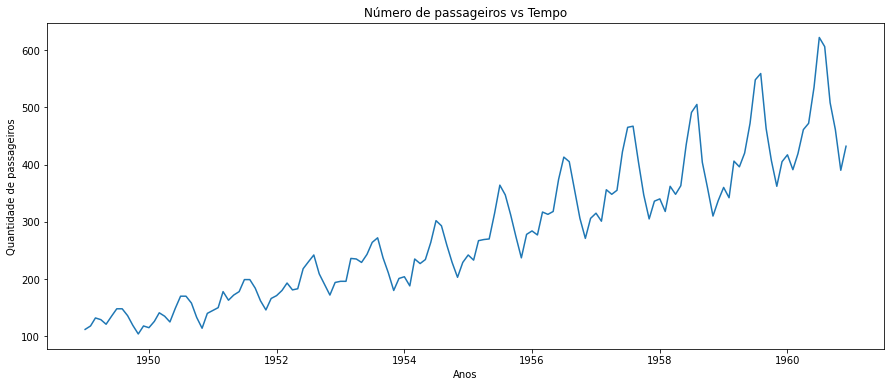

In [89]:
plt.plot(ts)
plt.title('Número de passageiros vs Tempo')
plt.xlabel('Anos')
plt.ylabel('Quantidade de passageiros')
plt.show()

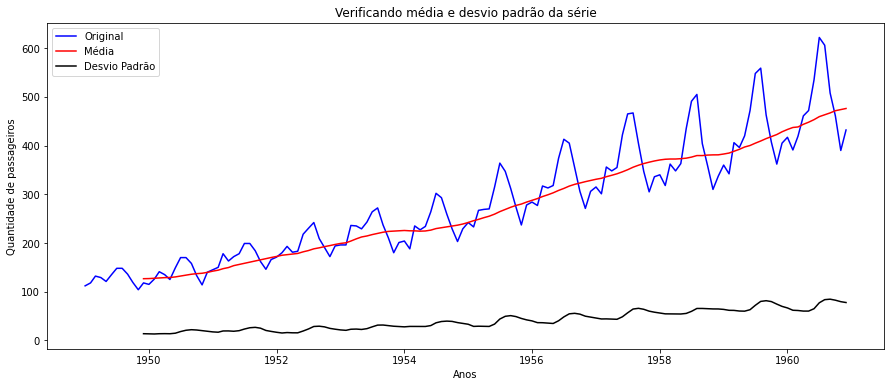

Resultados do teste de Dickey-Fuller:
Teste Estatístico                 0.815369
p-value                           0.991880
#Lags Usadas                     13.000000
Número de observações usadas    130.000000
Valor crítico (1%)               -3.481682
Valor crítico (5%)               -2.884042
Valor crítico (10%)              -2.578770
dtype: float64


In [90]:
# verificando se a série é estacionaria
test_stationarity(ts)

Embora a variação de desvio padrão seja pequena, a média está claramente aumentando com o tempo e isto não é uma característica de série estacionária. Além disso, o teste estatístico é muito maior do que os valores críticos. 

### Estimando e Eliminando Tendência



Nesta série vemos claramente que existe uma tendência positiva significativa. 

Com isso podemos aplicar uma transformação que penaliza os valores maiores mais do que valores menores. 

Podemos tomar o logaritmo, a raiz quadrada, a raiz cúbica, etc. 

#### Suavização - Logarítmica

**Suavização** refere-se às estimativas contínuas, ou seja, considerando os últimos casos. Pode ser feito de várias maneiras, aqui vou discutir duas delas.

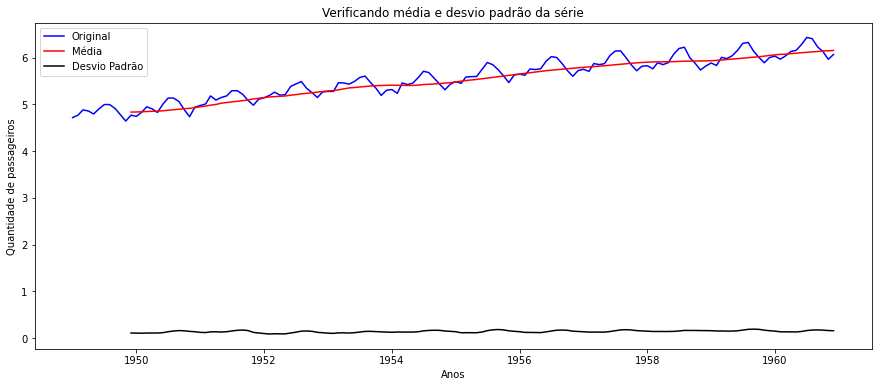

Resultados do teste de Dickey-Fuller:
Teste Estatístico                -1.717017
p-value                           0.422367
#Lags Usadas                     13.000000
Número de observações usadas    130.000000
Valor crítico (1%)               -3.481682
Valor crítico (5%)               -2.884042
Valor crítico (10%)              -2.578770
dtype: float64


In [92]:
ts_log = np.log(ts)
# verificando se a série é estacionaria
test_stationarity(ts_log)

#### Agregação - Média Móvel

A linha vermelha mostra no grafico apresentado na seção "Aplicando Teste de Dickey-Fuller" é a média móvel. Iremos subtrair isso da série original. Note-se que uma vez que estamos tomando média dos últimos 12 valores, a média móvel não está definida para 11 primeiros valores. 

In [93]:
moving_avg = ts_log.rolling(12).mean() # codigo igual interno na def test_stationarity
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

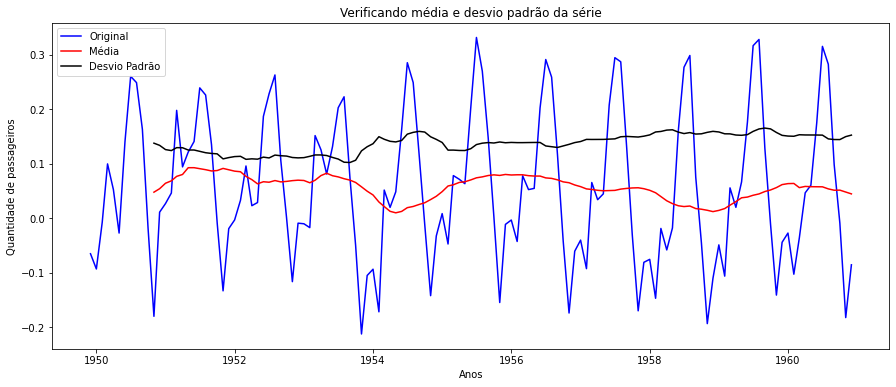

Resultados do teste de Dickey-Fuller:
Teste Estatístico                -3.162908
p-value                           0.022235
#Lags Usadas                     13.000000
Número de observações usadas    119.000000
Valor crítico (1%)               -3.486535
Valor crítico (5%)               -2.886151
Valor crítico (10%)              -2.579896
dtype: float64


In [94]:
# removendo os NaN's e plotando
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Parece uma série muito melhor. Os valores parecem ter variado um pouco, mas não há nenhuma tendência específica. Além disso, o *Teste Estatístico* [-3.16] é menor do que os *Valor Crítico* de 10% [-2.579896], 5% [-2.886151], com isso possamos dizer com 95% de confiança que esta é uma série estacionária.

Uma desvantagem dessa abordagem particular é que o período de tempo tem que ser rigorosamente definido. 

Nesse caso, podemos tomar médias anuais, mas em situações complexas como previsão de um preço das ações, é difícil chegar a um número. 



#### Agregação - Média Móvel Ponderada

Para minimizar o ponto negativo da média móvel usaremos a "média móvel ponderada", onde aos valores mais recentes é dado um peso maior. Não há muitas técnicas para atribuição de pesos. Uma popular é a média ponderada exponencial onde pesos são atribuídos a todos os valores anteriores com um fator de decaimento em movimento. 

Encontre detalhes [aqui](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-moment-functions). 
Isto pode ser implementado no pandas com:

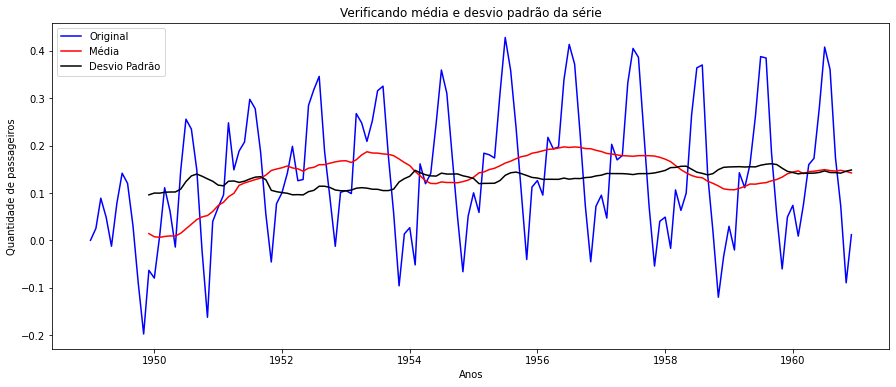

Resultados do teste de Dickey-Fuller:
Teste Estatístico                -3.601262
p-value                           0.005737
#Lags Usadas                     13.000000
Número de observações usadas    130.000000
Valor crítico (1%)               -3.481682
Valor crítico (5%)               -2.884042
Valor crítico (10%)              -2.578770
dtype: float64


In [95]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
ts_log_ewma_diff = ts_log - expwighted_avg 
test_stationarity(ts_log_ewma_diff)

Note que o parâmetro “halflife” é utilizado para definir o valor de decaimento exponencial. Este é apenas uma suposição que depende em grande parte do domínio do negócio.

Outros parâmetros de capacidade e de centro de massa também podem ser utilizados para definir decaimento e são discutidos nos links compartilhados acima.

O *Teste Estatístico* [-3,60] é menor do que o *Valor Crítico* de 1% [-3,48], o que é melhor do que no caso anterior. 

Note-se que, neste caso, não haverá valores faltantes, já que são dados pesos a todos os valores de saída. Por isso funciona mesmo sem valores anteriores.

#### Diferenciação

As técnicas acima não são muito boas para séries com alta sazonalidade. Por isso mostraremos sobre *diferenciação*. 

Na diferenciação fazemos a diferença de uma observação usando um instante em particular e o instante anterior. Essa técnica funciona muito bem para séries crescente.



Month
1949-01-01   NaN
Name: #Passengers, dtype: float64


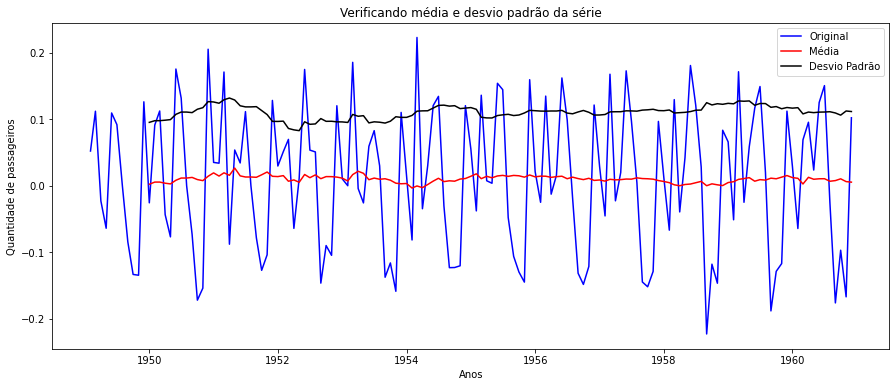

Resultados do teste de Dickey-Fuller:
Teste Estatístico                -2.717131
p-value                           0.071121
#Lags Usadas                     14.000000
Número de observações usadas    128.000000
Valor crítico (1%)               -3.482501
Valor crítico (5%)               -2.884398
Valor crítico (10%)              -2.578960
dtype: float64


In [96]:
ts_log_diff = ts_log - ts_log.shift()
print(ts_log_diff.head(1))
# removendo os NaN's e plotando
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Os valores de média e desvio padrão parecem ter variado um pouco, mas não há nenhuma tendência específica. Além disso, o *Teste Estatístico* [-2.717131] é menor do que os *Valor Crítico* de 10% [-2.57], com isso possamos dizer com 90% de confiança que esta é uma série estacionária. 

#### Decomposição

Nesta abordagem, tanto tendência quanto sazonalidade são modeladas separadamente e a parte restante da série é devolvida. 

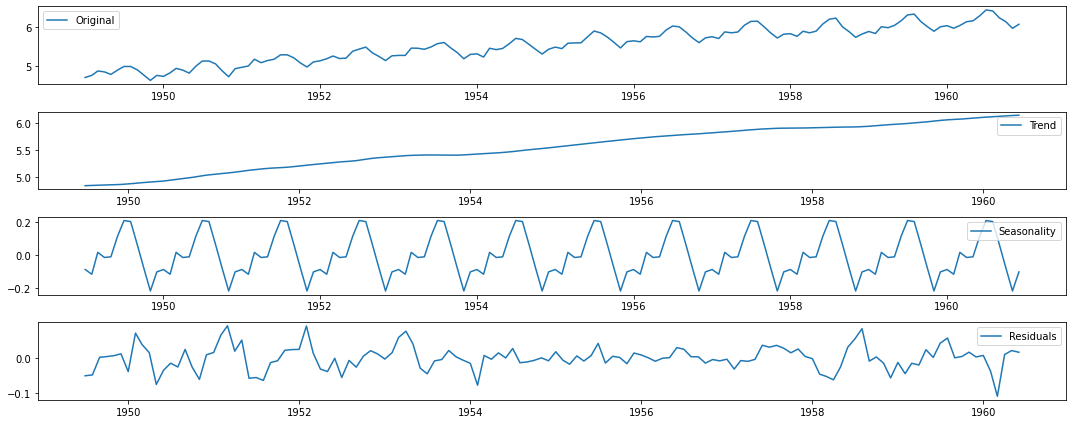

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.subplot(411) 
plt.plot(ts_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

Aqui podemos ver que a tendência e a sazonalidade são separadas  e podemos modelar os resíduos. Vamos verificar a estacionaridade dos resíduos:

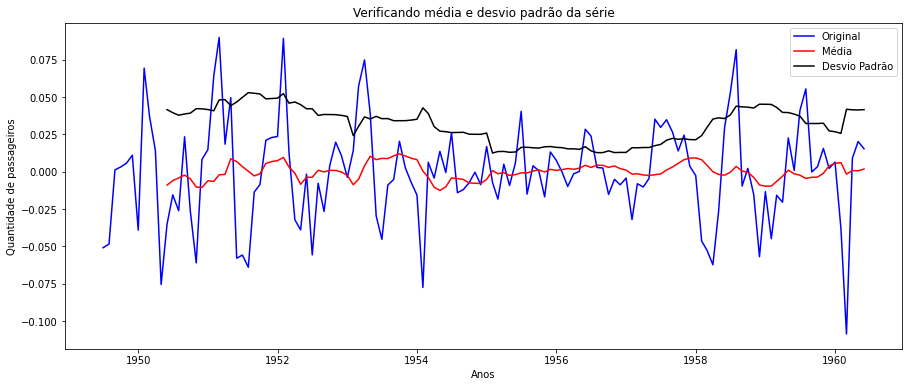

Resultados do teste de Dickey-Fuller:
Teste Estatístico              -6.332387e+00
p-value                         2.885059e-08
#Lags Usadas                    9.000000e+00
Número de observações usadas    1.220000e+02
Valor crítico (1%)             -3.485122e+00
Valor crítico (5%)             -2.885538e+00
Valor crítico (10%)            -2.579569e+00
dtype: float64


In [98]:
ts_log_decompose = residual 
ts_log_decompose.dropna(inplace=True) 
test_stationarity(ts_log_decompose)

A estatística do teste Dickey-Fuller é significativamente menor do que o valor crítico de 1%. Portanto, essa TS é muito próxima a estacionária. Você pode tentar técnicas de decomposição avançadas, que podem gerar melhores resultados. Além disso, você deve observar que a conversão dos resíduos em valores originais para dados futuros não são muito intuitivas neste caso.

### Forecast


Mostramos várias técnicas para tornar uma série estacionária. Mas nesse estudo usaremos a diferenciação (```ts_log_diff```) para fazer previsão.

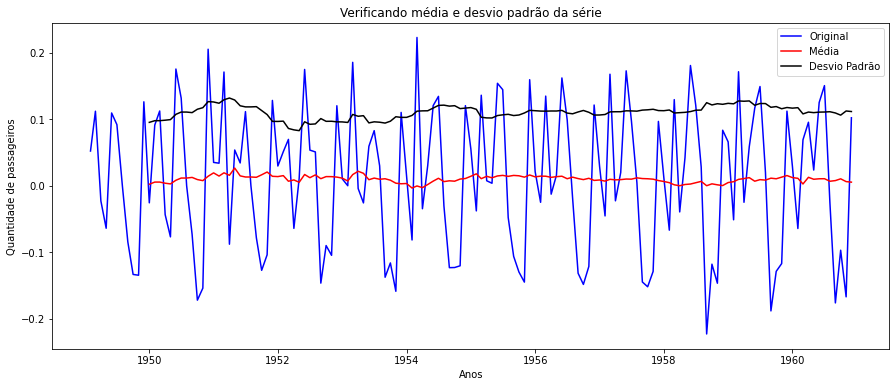

Resultados do teste de Dickey-Fuller:
Teste Estatístico                -2.717131
p-value                           0.071121
#Lags Usadas                     14.000000
Número de observações usadas    128.000000
Valor crítico (1%)               -3.482501
Valor crítico (5%)               -2.884398
Valor crítico (10%)              -2.578960
dtype: float64


In [99]:
test_stationarity(ts_log_diff)

### ARIMA

**ARIMA** - Médias Móveis Integradas e Auto-Regressia (Auto-Regressive Integrated Moving Average).

O ARIMA faz previsão de série temporal usando equação linear (como regressão linear).

Os parâmetros do ARIMA são (p, q, d):

*   **p** - números de termos AR (auto-regressivo): os termos AR são apenas defasagens da variável dependente. Por exemplo, se o símbolo **p** representa 5, os preditores de ```x(T)``` serão ```X(t-1) ... X(t-5)```.

*   **q** - número de termos MA (média móvel): termos MA são erros de previsão defasados na equação de projeção. Por exemplo, se **q** é 5, os preditores para ```x(t)``` serão ```e(t-1) ... e(t-5)```, onde ```e(i)``` é a diferença entre a média móvel no instante *i* e o valor real.

* **d** - número de diferenças: número de diferenças não sazonais. Como usaremos difença logaritma usaremos **d**=0, mas poderiamos usar **d**=1 e colocar o valor original.

A principal preocupação é o ajuste do parâmetros **p** e **q**. 







#### Ajustando p - modelo AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

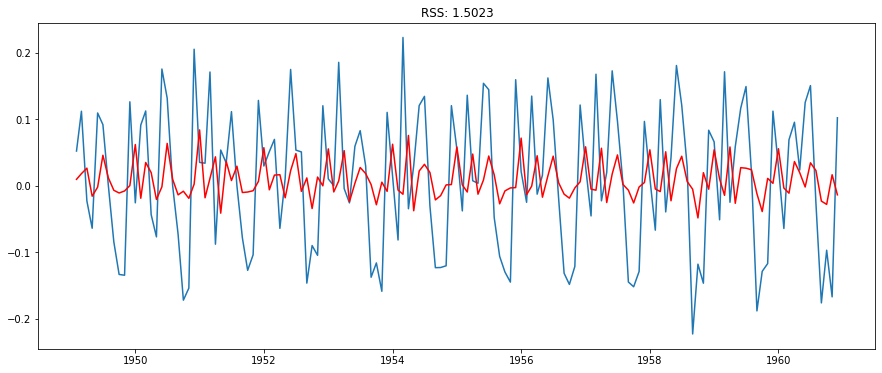

In [100]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

#### Ajustando q - modelo MA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

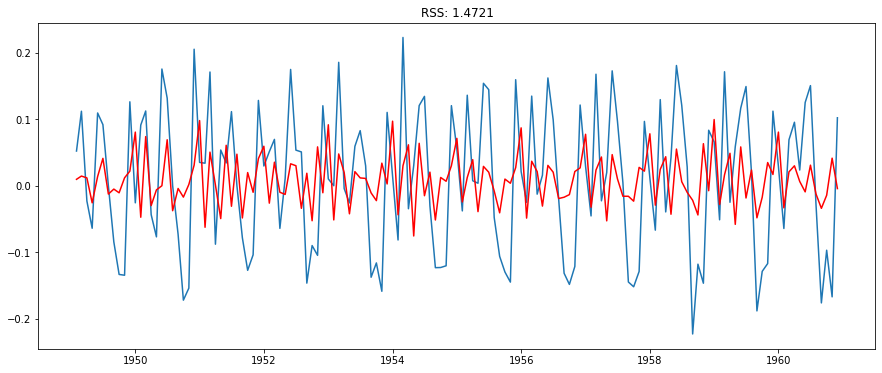

In [101]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#### Modelo Combinado

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

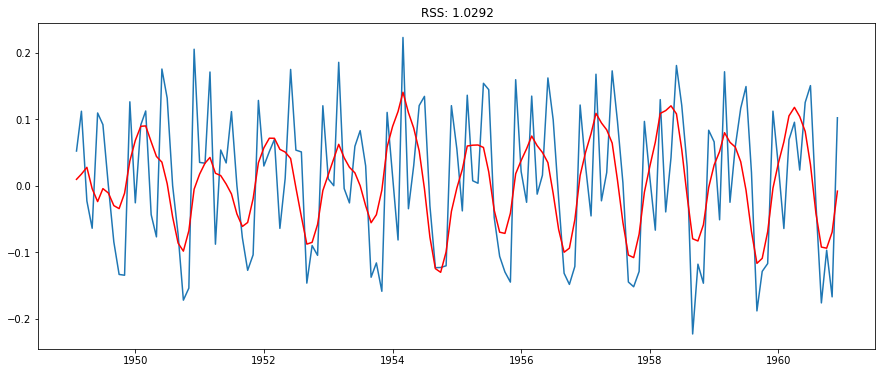

In [102]:
model = ARIMA(ts_log, order=(2, 1, 2)) 
results_ARIMA = model.fit(disp=-1) 
plt.plot(ts_log_diff) 
plt.plot(results_ARIMA.fittedvalues, color='red') 
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Aqui podemos ver que os modelos AR e MA têm quase a mesma RSS, mas combinado é significativamente melhor. Agora, ficamos com um último passo, ou seja, trazer esses valores de volta para a escala original.

#### Preditor

Usaremos o modelo combinado que deu melhor resultado. 

Primeiro fazemos a predição e em seguida fazermos a transformada inversa para que os valores previstos estejam no mesmo espaço dos valores originais.

In [103]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


Observe que os resultados começam a partir de “1949/02/01”, e não do primeiro mês. Isto é porque nós tomamos o atraso por 1 e o primeiro elemento não tem nada antes de subtrair. 

#### Transformação inversa



A maneira de converter a diferenciação de escala logarítmica é adicionar essas diferenças consecutivamente ao número base. Uma maneira fácil de fazer isso é primeiro determinar a soma cumulativa no índice e, em seguida, adicioná-la ao número base. A soma cumulativa pode ser encontrada como:

In [104]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


Você pode rapidamente fazer algumas contas de cabeça usando a saída anterior para verificar se estão corretos. Em seguida temos que adicioná-los ao número base. Para isso, vamos criar uma série com todos os valores como número base e adicionar as diferenças a ela. Isto pode ser feito como:

In [105]:
print(ts_log.head(), '\n')
print(predictions_ARIMA_diff_cumsum.head(), '\n')

print('1949-02-01', ts_log.iloc[0])
print('1949-02-01', ts_log.iloc[0] + predictions_ARIMA_diff_cumsum.iloc[0])

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64 

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64 

1949-02-01 4.718498871295094
1949-02-01 4.728078927525487


Aqui, o primeiro elemento é o número base em si e a partir dele os valores cumulativamente somados. 

In [106]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0) 
print(predictions_ARIMA_log.head())

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64


O último passo é tomar o expoente e comparar com a série original.

In [107]:
predictions_ARIMA = np.exp(predictions_ARIMA_log) 
print(predictions_ARIMA.head())

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073413
1949-04-01    118.301982
1949-05-01    117.768358
dtype: float64


#### Comparação

Comparando séire original e predita. 

Text(0.5, 1.0, 'RMSE: 90.1045')

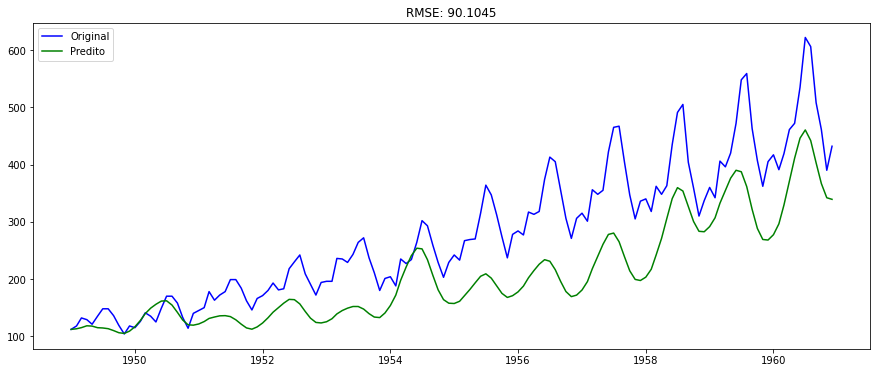

In [108]:
plt.plot(ts, color='blue',label='Original') 
plt.plot(predictions_ARIMA, color='green',label='Predito') 
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Finalmente temos uma previsão na escala original. 

Não é uma projeção muito boa, mas é um primeiro passo para melhorar o preditor.